In [ ]:
# Refer https://colab.research.google.com/notebooks/io.ipynb for file copy help
 
import gdown
 
# url = 'https://drive.google.com/uc?id=1IuEaRnCUA-TSzQC177PIRLUXhrx63dh6'  # 42 images
url = 'https://drive.google.com/uc?id=1ZrnMdjrJAyJwdsH1L2W6pmL8hjFFuhqw' # entire datset
 
zipfile = 'dataset.zip'
unzip_loc = '/content/data/'
 
gdown.download(url, zipfile, quiet=False)
 
!unzip -q "{zipfile}" -d "{unzip_loc}"
 
# Remove zip
!rm "{zipfile}"
 
# # Clear dataset folder ONLY if reqd
# !rm -rf "{unzip_loc}"

Downloading...
From: https://drive.google.com/uc?id=1ZrnMdjrJAyJwdsH1L2W6pmL8hjFFuhqw
To: /content/dataset.zip
1.56GB [00:14, 111MB/s]


In [ ]:
!pip install utils

In [ ]:
import os
import random
import numpy as np
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
import utils as utils
import time; _START_RUNTIME = time.time()

# # set seed
# seed = 24
# random.seed(seed)
# np.random.seed(seed)
# torch.manual_seed(seed)
# os.environ["PYTHONHASHSEED"] = str(seed)

# # Define data path
# DATA_PATH = "/content/data/"
# print (DATA_PATH)
# assert os.path.isdir(DATA_PATH)
DATA_PATH = "/content/data/"
!pip install split-folders tqdm
import splitfolders
splitfolders.ratio(unzip_loc, output= DATA_PATH, seed=1337, ratio=(0.6,0.2,0.2))

NameError: ignored

In [ ]:
# shutil.rmtree('/content/data/train')
# shutil.rmtree('/content/data/test')
# shutil.rmtree('/content/data/val')

The code snippet below splits the data into 60:20:20 as train:val:test and separates them out as different folder structure with COVID and Non-COVID folders within each. 


```
data
  |
  |
  |---train
  |     |
  |     |-COVID(2169 images)
  |     |-Non-COVID(2169 images)
  |
  |---val
  |     |
  |     |-COVID (723 images)
  |     |-Non-COVID (723 images)
  |
  |
  |---test
  |     |
  |     |-COVID (724 Images)
  |     |-Non-COVID (724 Images)
```


In [ ]:
# # Creating Train / Val / Test folders (One time use)
# import os
# import numpy as np
# import shutil
# import random
# root_dir = '/content/data/' # data root path
# classes_dir = ['COVID', 'Non-COVID'] #total labels

# val_ratio = 0.20
# test_ratio = 0.20

# for cls in classes_dir:
#     os.makedirs(root_dir +'train/' + cls)
#     os.makedirs(root_dir +'val/' + cls)
#     os.makedirs(root_dir +'test/' + cls)


# # Creating partitions of the data after shuffeling
#     src = root_dir + cls # Folder to copy images from

#     allFileNames = os.listdir(src)
#     np.random.seed(12345)
#     np.random.shuffle(allFileNames)
#     train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
#                                                           [int(len(allFileNames)* (1 - (val_ratio + test_ratio))), 
#                                                            int(len(allFileNames)* (1 - test_ratio))])


#     train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
#     val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
#     test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

#     print('Total images: ', len(allFileNames))
#     print('Training: ', len(train_FileNames))
#     print('Validation: ', len(val_FileNames))
#     print('Testing: ', len(test_FileNames))

#     # Copy-pasting images
#     for name in train_FileNames:
#         shutil.copy(name, root_dir +'train/' + cls)

#     for name in val_FileNames:
#         shutil.copy(name, root_dir +'val/' + cls)

#     for name in test_FileNames:
#         shutil.copy(name, root_dir +'test/' + cls)

In [ ]:
folder = 'train'
print (len(os.listdir(os.path.join(DATA_PATH, folder,'COVID'))))

folder1 = 'test'
print (len(os.listdir(os.path.join(DATA_PATH, folder1,'COVID'))))

2169
724


In [ ]:
# #input
# # folder: str, 'train' or 'val'
# #output
# # number_normal: number of normal samples in the given folder
# # number_pneumonia: number of pneumonia samples in the given folder
# def get_count_metrics(folder, data_path=DATA_PATH):
    
    
#     '''
#     TODO: Implement this function to return the number of normal and pneumonia samples.
#           Hint: !ls $DATA_PATH
#     '''
#     number_normal = len(os.listdir(os.path.join(data_path, folder, "Non-COVID")))
#     number_covid = len(os.listdir(os.path.join(data_path, folder, "COVID")))
#     # your code here

#     return number_normal, number_covid


# #output
# # train_loader: train data loader (type: torch.utils.data.DataLoader)
# # val_loader: val data loader (type: torch.utils.data.DataLoader)
# def load_data(data_path=DATA_PATH):
    
#     '''
#     TODO: Implement this function to return the data loader for 
#     train and validation dataset. Set batchsize to 32.
    
#     You should add the following transforms (https://pytorch.org/docs/stable/torchvision/transforms.html):
#         1. transforms.RandomResizedCrop: the images should be cropped to 224 x 224
#         2. transforms.ToTensor: just to convert data/labels to tensors
#     You should set the *shuffle* flag for *train_loader* to be True, and False for *val_loader*.
    
#     HINT: Consider using `torchvision.datasets.ImageFolder`.
#     '''
    
#     import torchvision
#     import torchvision.datasets as datasets
#     import torchvision.transforms as transforms
    
   
#     BATCH_SIZE = 32
#     TRAIN_DATA_PATH = os.path.join(DATA_PATH, 'train')
#     TEST_DATA_PATH = os.path.join(DATA_PATH, 'val')
#     TRANSFORM_IMG = transforms.Compose([
#     transforms.RandomResizedCrop(256),
#     transforms.ToTensor()
#     ])

#     train_data = torchvision.datasets.ImageFolder(root=TRAIN_DATA_PATH, transform=TRANSFORM_IMG)
#     train_loader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
#     val_data = torchvision.datasets.ImageFolder(root=TEST_DATA_PATH, transform=TRANSFORM_IMG)
#     val_loader  = torch.utils.data.DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False) 


    
  
#     return train_loader, val_loader

In [ ]:
# assert type(get_count_metrics('train')) is tuple
# assert type(get_count_metrics('val')) is tuple

# get_count_metrics('train') 
# # get_count_metrics('val') 

In [ ]:

!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 48.6MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.4.0 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101


In [ ]:
from fastai.vision import *

In [ ]:
path = 'data'
np.random.seed(41)
data = ImageDataBunch.from_folder(path, train="train", valid ="val",
        ds_tfms=get_transforms(), size=(224,224), bs=32, num_workers=2).normalize()

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['COVID', 'Non-COVID'], 2, 4338, 1446)

In [ ]:
print("Number of examples in training:", len(data.train_ds))
print("Number of examples in validation:", len(data.valid_ds))

Number of examples in training: 4338
Number of examples in validation: 1446


In [ ]:
xb,yb = data.one_batch()
xb.shape,yb.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [ ]:
# train_loader, val_loader = load_data()

# assert type(train_loader) is torch.utils.data.dataloader.DataLoader

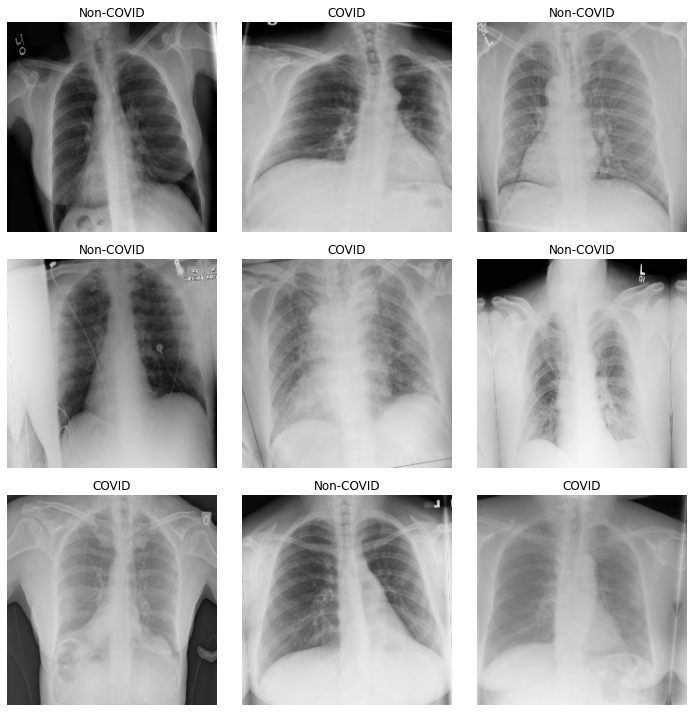

In [ ]:
data.show_batch(rows=3, figsize=(10,10))

In [ ]:
def conv_block(ni, nf, size=3, stride=1):
    for_pad = lambda s: s if s > 2 else 3
    return nn.Sequential(
        nn.Conv2d(ni, nf, kernel_size=size, stride=stride,
                  padding=(for_pad(size) - 1)//2, bias=False), 
        nn.BatchNorm2d(nf),
        nn.LeakyReLU(negative_slope=0.1, inplace=True)  
    )

In [ ]:

def triple_conv(ni, nf):
    return nn.Sequential(
        conv_block(ni, nf),
        conv_block(nf, ni, size=1),  
        conv_block(ni, nf)
    )

In [ ]:
def maxpooling():
    return nn.MaxPool2d(2, stride=2)

In [ ]:
model = nn.Sequential(
    conv_block(3, 8),
    maxpooling(),
    conv_block(8, 16),
    maxpooling(),
    triple_conv(16, 32),
    maxpooling(),
    triple_conv(32, 64),
    maxpooling(),
    triple_conv(64, 128),
    maxpooling(),
    triple_conv(128, 256),
    conv_block(256, 128, size=1),
    conv_block(128, 256),
    conv_layer(256, 2),
    Flatten(),
    nn.Linear(288, 2)
)

In [ ]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

Run 100 epoch

In [ ]:
learn.model = model.cuda()

learn.fit_one_cycle(20, max_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: ignored

In [ ]:
print(learn.summary())

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 224, 224]        216        True      
______________________________________________________________________
BatchNorm2d          [8, 224, 224]        16         True      
______________________________________________________________________
LeakyReLU            [8, 224, 224]        0          False     
______________________________________________________________________
MaxPool2d            [8, 112, 112]        0          False     
______________________________________________________________________
Conv2d               [16, 112, 112]       1,152      True      
______________________________________________________________________
BatchNorm2d          [16, 112, 112]       32         True      
______________________________________________________________________
LeakyReLU            [16, 112, 112]       0          False     
___________________________________________________

In [ ]:
# class DarkNet(nn.Module):
#     def __init__(self):
#         super(DarkNet, self).__init__()

#         self.pool =  nn.MaxPool2d(2, stride=2)

#         self.layer1 = nn.Sequential()
#         self.layer1.add_module('Conv1',nn.Conv2d(3, 8, kernel_size=3, stride=1,padding=1, bias=False) )
#         self.layer1.add_module('BN1',nn.BatchNorm2d(8))
#         self.layer1.add_module('LRelU1', nn.LeakyReLU(negative_slope=0.1, inplace=True)) 
        
#         self.layer2 = nn.Sequential()
#         self.layer2.add_module('Conv2',nn.Conv2d(8, 16, kernel_size=3, stride=1,padding=1, bias=False) )
#         self.layer2.add_module('BN2',nn.BatchNorm2d(16))
#         self.layer2.add_module('LRelU2', nn.LeakyReLU(negative_slope=0.1, inplace=True)) 


#         self.layer3 = nn.Sequential()
#         self.layer3.add_module('Conv3',nn.Conv2d(16, 32, kernel_size=3, stride=1,padding=1, bias=False) )
#         self.layer3.add_module('BN3',nn.BatchNorm2d(32))
#         self.layer3.add_module('LRelU3', nn.LeakyReLU(negative_slope=0.1, inplace=True)) 

#         self.layer4 = nn.Sequential()
#         self.layer4.add_module('Conv4',nn.Conv2d(16, 32, kernel_size=1, stride=1,padding=1, bias=False) )
#         self.layer4.add_module('BN4',nn.BatchNorm2d(32))
#         self.layer4.add_module('LRelU4', nn.LeakyReLU(negative_slope=0.1, inplace=True)) 

#         self.layer5 = nn.Sequential()
#         self.layer5.add_module('Conv5',nn.Conv2d(16, 32, kernel_size=3, stride=1,padding=1, bias=False) )
#         self.layer5.add_module('BN5',nn.BatchNorm2d(32))
#         self.layer5.add_module('LRelU5', nn.LeakyReLU(negative_slope=0.1, inplace=True))  

#         self.layer6 = nn.Sequential()
#         self.layer6.add_module('Conv6',nn.Conv2d(32, 64, kernel_size=3, stride=1,padding=1, bias=False) )
#         self.layer6.add_module('BN6',nn.BatchNorm2d(64))
#         self.layer6.add_module('LRelU6', nn.LeakyReLU(negative_slope=0.1, inplace=True)) 

#         self.layer7 = nn.Sequential()
#         self.layer7.add_module('Conv7',nn.Conv2d(32, 64, kernel_size=1, stride=1,padding=1, bias=False) )
#         self.layer7.add_module('BN7',nn.BatchNorm2d(64))
#         self.layer7.add_module('LRelU7', nn.LeakyReLU(negative_slope=0.1, inplace=True)) 

#         self.layer8 = nn.Sequential()
#         self.layer8.add_module('Conv8',nn.Conv2d(32, 64, kernel_size=3, stride=1,padding=1, bias=False) )
#         self.layer8.add_module('BN8',nn.BatchNorm2d(64))
#         self.layer8.add_module('LRelU8', nn.LeakyReLU(negative_slope=0.1, inplace=True)) 

#         self.layer9 = nn.Sequential()
#         self.layer9.add_module('Conv9',nn.Conv2d(64, 128, kernel_size=3, stride=1,padding=1, bias=False) )
#         self.layer9.add_module('BN9',nn.BatchNorm2d(128))
#         self.layer9.add_module('LRelU9', nn.LeakyReLU(negative_slope=0.1, inplace=True)) 

#         self.layer10 = nn.Sequential()
#         self.layer10.add_module('Conv10',nn.Conv2d(64, 128, kernel_size=3, stride=1,padding=1, bias=False) )
#         self.layer10.add_module('BN10',nn.BatchNorm2d(128))
#         self.layer10.add_module('LRelU10', nn.LeakyReLU(negative_slope=0.1, inplace=True)) 

#         self.layer11 = nn.Sequential()
#         self.layer11.add_module('Conv11',nn.Conv2d(64, 128, kernel_size=3, stride=1,padding=1, bias=False) )
#         self.layer11.add_module('BN11',nn.BatchNorm2d(128))
#         self.layer11.add_module('LRelU11', nn.LeakyReLU(negative_slope=0.1, inplace=True)) 


#         self.layer12 = nn.Sequential()
#         self.layer12.add_module('Conv12',nn.Conv2d(128, 128, kernel_size=3, stride=1,padding=1, bias=False) )
#         self.layer12.add_module('BN12',nn.BatchNorm2d(128))
#         self.layer12.add_module('LRelU12', nn.LeakyReLU(negative_slope=0.1, inplace=True)) 

#         self.layer13 = nn.Sequential()
#         self.layer13.add_module('Conv13',nn.Conv2d(64, 128, kernel_size=3, stride=1,padding=1, bias=False) )
#         self.layer13.add_module('BN13',nn.BatchNorm2d(128))
#         self.layer13.add_module('LRelU13', nn.LeakyReLU(negative_slope=0.1, inplace=True)) 

#         self.layer14 = nn.Sequential()
#         self.layer14.add_module('Conv14',nn.Conv2d(64, 128, kernel_size=3, stride=1,padding=1, bias=False) )
#         self.layer14.add_module('BN14',nn.BatchNorm2d(128))
#         self.layer14.add_module('LRelU14', nn.LeakyReLU(negative_slope=0.1, inplace=True)) 

#         self.layer15 = nn.Sequential()
#         self.layer15.add_module('Conv15',nn.Conv2d(256, 128, kernel_size=3, stride=1,padding=1, bias=False) )
#         self.layer15.add_module('BN15',nn.BatchNorm2d(128))
#         self.layer15.add_module('LRelU15', nn.LeakyReLU(negative_slope=0.1, inplace=True)) 

        
#         self.layer16 = nn.Sequential()
#         self.layer16.add_module('Conv16',nn.Conv2d(128, 2, kernel_size=3, stride=1,padding=1, bias=False) )
#         self.layer16.add_module('BN16',nn.BatchNorm2d(2))
#         self.layer16.add_module('LRelU16', nn.LeakyReLU(negative_slope=0.1, inplace=True)) 
        
        

#         self.fc1 = nn.Linear(338, 2)
#         self.dropout = nn.Dropout(p=0.5)
    
#     def forward(self, x):
#         #input is of shape (batch_size=32, 3, 224, 224) if you did the dataloader right
#         # your code here
#         print (x.shape)
#         x = self.layer1(x)
#         print ("After conv1")
#         x = self.pool(x)
#         x = self.layer2(x)
#         x = self.pool(x)
#         x = self.layer5(self.layer4(self.layer3(x)))
#         x = self.pool(x)
#         x = self.layer8(self.layer7(self.layer6(x)))
#         x = self.pool(x)
#         x = self.layer11(self.layer10(self.layer9(x)))
#         x = self.pool(x)
#         x = self.layer14(self.layer13(self.layer12(x)))
#         x = self.pool(x)
#         x = self.layer15(x)
#         x = self.layer16(x)

#         # x = self.pool(nn.LeakyReLU(nn.BatchNorm2d(self.conv5(self.conv4(self.conv3(x)))), negative_slope=0.1, inplace=True))
#         # x = self.pool(nn.LeakyReLU(nn.BatchNorm2d(self.conv8(self.conv7(self.conv6(x)))), negative_slope=0.1, inplace=True))
#         # x = self.pool(nn.LeakyReLU(nn.BatchNorm2d(self.conv11(self.conv10(self.conv9(x)))), negative_slope=0.1, inplace=True))
#         # x = self.pool(nn.LeakyReLU(nn.BatchNorm2d(self.conv14(self.conv13(self.conv12(x)))), negative_slope=0.1, inplace=True))
#         x = x.view(-1, 338)
#         x = self.fc1(x)
#         print ("After layers")
#         print (x.shape)
#         return x
    # def num_flat_features(self, x):
    #     size = x.size()[1:]  # all dimensions except the batch dimension
    #     num_features = 1
    #     for s in size:
    #         num_features *= s
    #     return num_features


In [ ]:
# model = DarkNet()

# issubclass(type(model), nn.Module)
# # len(list(simple_model.modules()))  

In [ ]:

# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(),betas=(0.9, 0.999), lr=0.001)

In [ ]:
# n_epochs = 1

# def train_model(model, train_dataloader, n_epoch=n_epochs, optimizer=optimizer, criterion=criterion):
#     import torch.optim as optim
#     """
#     :param model: A CNN model
#     :param train_dataloader: the DataLoader of the training data
#     :param n_epoch: number of epochs to train
#     :return:
#         model: trained model
#     TODO:
#         Within the loop, do the normal training procedures:
#             pass the input through the model
#             pass the output through loss_func to compute the loss (name the variable as *loss*)
#             zero out currently accumulated gradient, use loss.basckward to backprop the gradients, then call optimizer.step
#     """
#     model.train() # prep model for training
    
    
#     for epoch in range(n_epoch):
#         curr_epoch_loss = []
#         for data, target in train_dataloader:
#             # your code here
#             optimizer.zero_grad()
#             target_hat = model(data)
#             loss = criterion(target_hat, target)
#             loss.backward()
#             optimizer.step()
#             curr_epoch_loss.append(loss.cpu().data.numpy())
#         print(f"Epoch {epoch}: curr_epoch_loss={np.mean(curr_epoch_loss)}")
#     return model


In [ ]:
# # get train and val data loader
# train_loader, val_loader = load_data()

# seed = 24
# random.seed(seed)
# np.random.seed(seed)
# torch.manual_seed(seed)

# model = train_model(model, train_loader)




In [ ]:
print("Number of examples in testing:", len(data.valid_ds))

Number of examples in testing: 1446


In [ ]:
probs,targets = learn.get_preds(ds_type=DatasetType.Valid)

In [ ]:
accuracy(probs,targets)

tensor(0.9952)

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['COVID', 'Non-COVID'], 2, 4338, 1446)

In [ ]:
probs = np.argmax(probs, axis=1)
correct = 0
for idx, pred in enumerate(probs):
    if pred == targets[idx]:
        correct += 1
accuracy = correct / len(probs)
print(len(probs), correct, accuracy)

from sklearn.metrics import confusion_matrix
np.set_printoptions(threshold=np.inf) 
cm1 = confusion_matrix(targets, probs)
print(cm1)

from sklearn.metrics import classification_report
y_true1 = targets
y_pred1 = probs
target_names = ['Covid', 'Non COVID']
print(classification_report(y_true1, y_pred1, target_names=target_names))

1446 1439 0.9951590594744122
[[719   4]
 [  3 720]]
              precision    recall  f1-score   support

       Covid       1.00      0.99      1.00       723
   Non COVID       0.99      1.00      1.00       723

    accuracy                           1.00      1446
   macro avg       1.00      1.00      1.00      1446
weighted avg       1.00      1.00      1.00      1446



In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

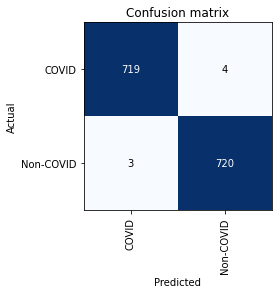

In [ ]:
cm_fig = interp.plot_confusion_matrix(return_fig=True)
ax = cm_fig.gca()
ax.set_ylim(interp.data.c - .5, - .5);

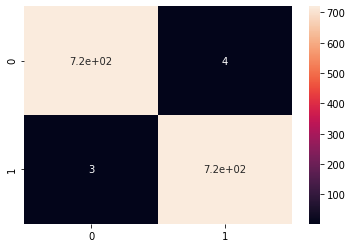

In [ ]:
import seaborn as sns
sns.heatmap(cm1, annot=True)

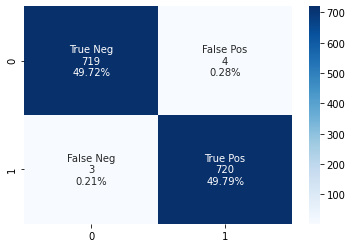

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm1.flatten()/np.sum(cm1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm1, annot=labels, fmt='', cmap='Blues')